In [18]:
import pandas as pd
import seaborn as sns

In [19]:
train_df = pd.read_csv('train.csv')

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
print(train_df.shape)

(891, 12)


In [22]:
print(train_df.describe)

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [24]:
print(train_df.describe(include=['O']))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [25]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

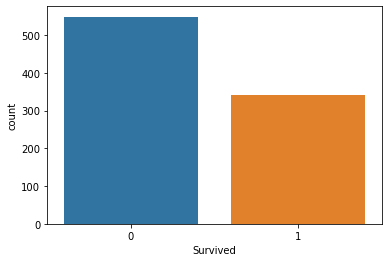

In [26]:
sns.countplot(x='Survived', data=train_df)

In [27]:
# Data Preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [28]:
# Drop unnecessary columns
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Encode categorical features
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'].fillna('missing')) # fill missing values
test_df['Embarked'] = le.transform(test_df['Embarked'].fillna('missing'))

# Fill in missing values
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])
test_df['Fare'] = imputer.transform(test_df[['Fare']])

/home/espersonnel/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- Age

  warnings.warn(message, FutureWarning)


In [29]:
# Split the train data into train and validation

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Split data into features and target
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']

# Split data into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on validation set and calculate accuracy
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print('Validation accuracy: ', accuracy)

Validation accuracy:  0.7877094972067039


/home/espersonnel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
test_preds = model.predict(test_df)

# Save predictions to a CSV file
submission_df = pd.DataFrame({'PassengerId': test_df.index, 'Survived': test_preds})
submission_df.to_csv('submission.csv', index=False)

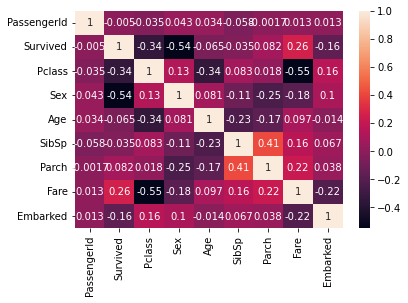

In [31]:
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = train_df.corr()

# Create a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

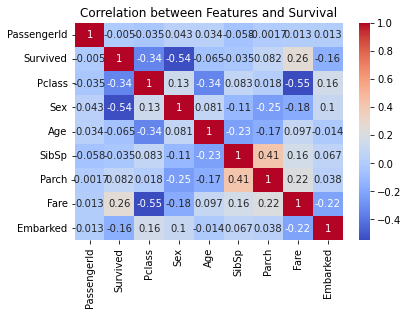

In [32]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Features and Survival')
plt.show()